## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
RANDOM_SEED = 42

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\Dell


In [3]:
#Setting current working directory
os.chdir("/Users/Zahed/Wine Qaulity Project")

## Loading the dataset

In [4]:
#importing Dataset
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df.shape

(1599, 12)

In [5]:
#Statistical  Information
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Additional info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observation:All the Features of TypeFloat only Qaulity variable is of integer type

## Preprocessing of Data Analysis

In [7]:
# Check for Null Values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation:There are no Missing Values in any of the columns in dataset

## Exploratory Data Analysis

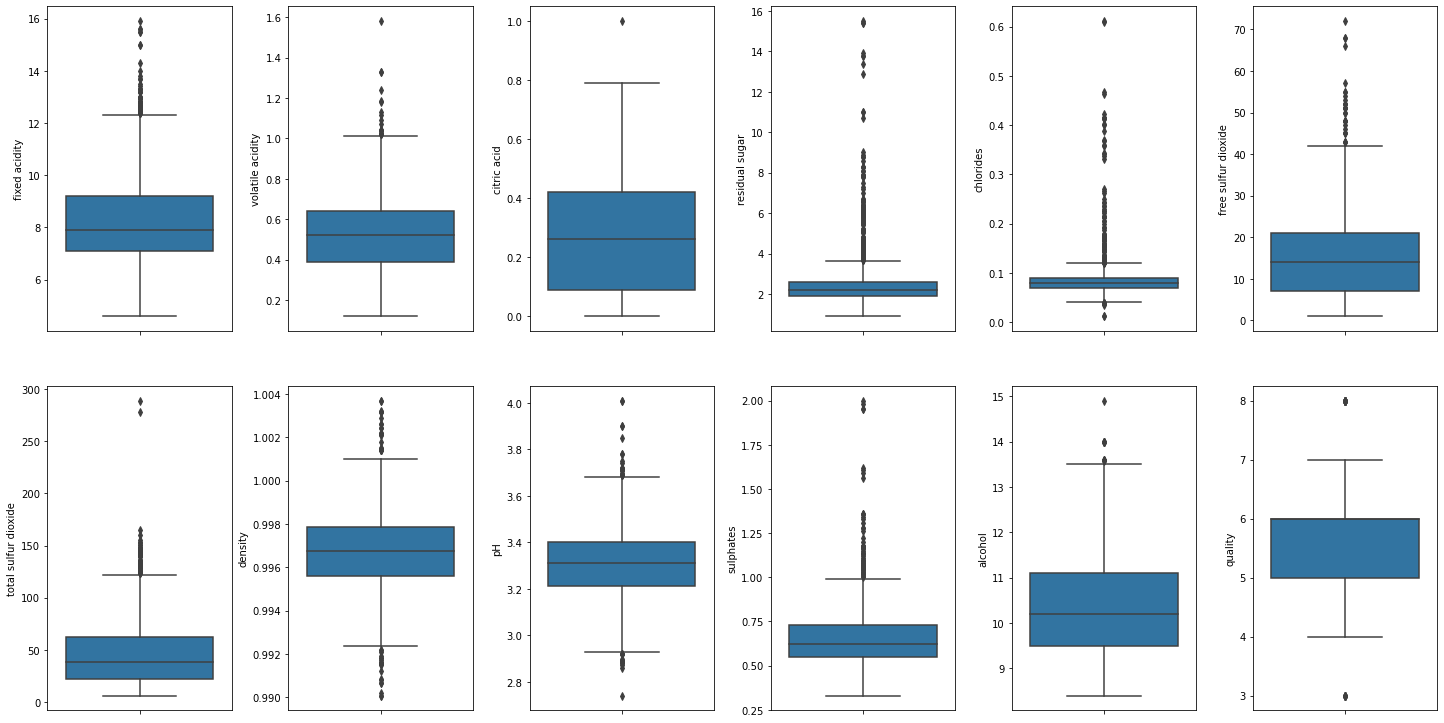

In [13]:
#Create Boxplots to check outliers
fig, ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col !='type':
        sn.boxplot(y=col,data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
Observation:There are outliers observed in few columns such as (total sulfur dioxide)(citric acid)(chlorides)

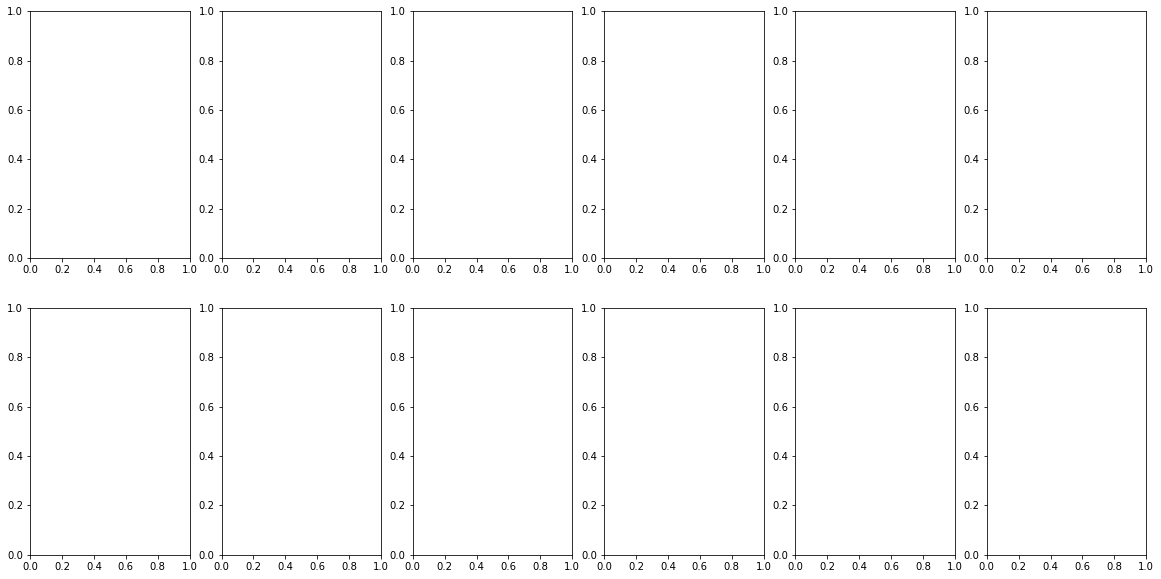

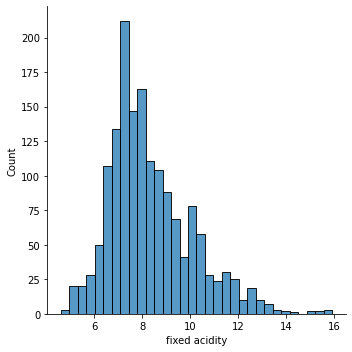

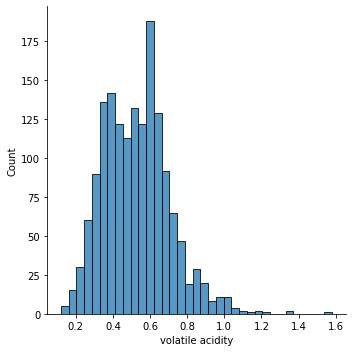

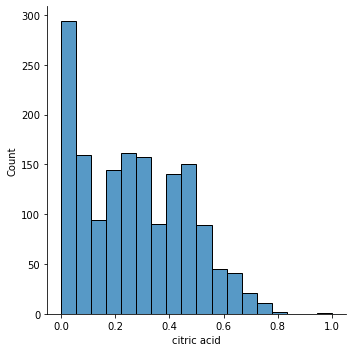

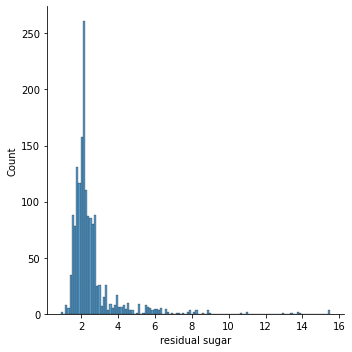

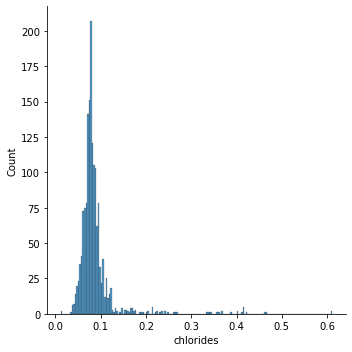

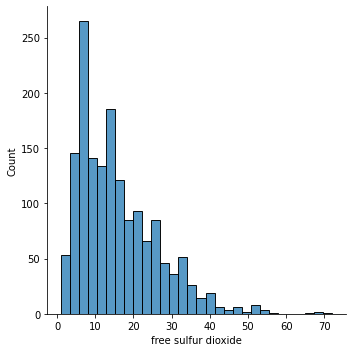

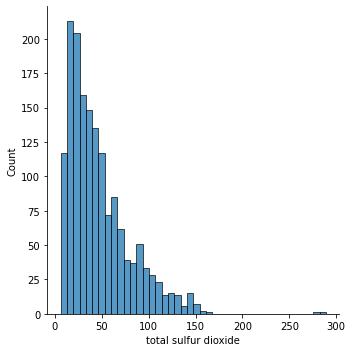

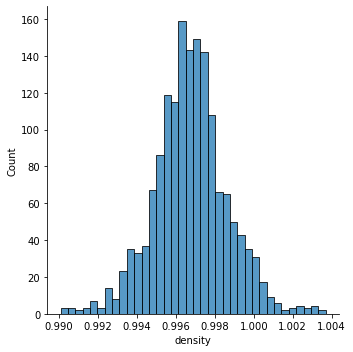

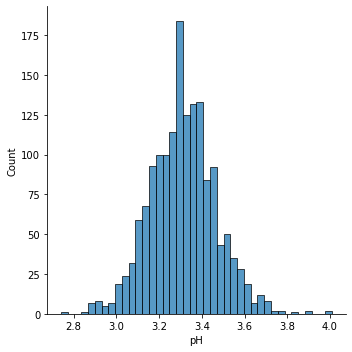

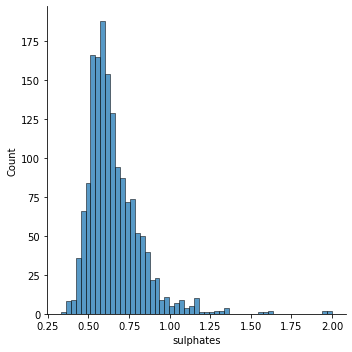

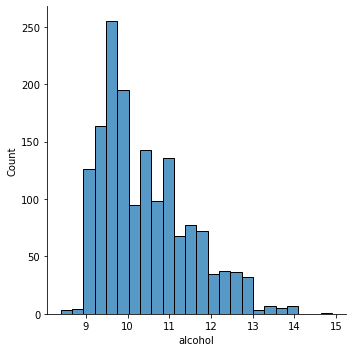

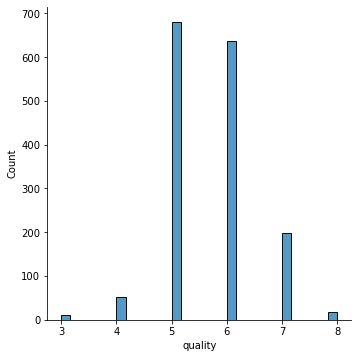

In [17]:
#Create Distplot to check outliers
fig, ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col !='type':
        sn.displot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.8,w_pad=0.8,h_pad=6.0)

In [19]:
#Log Transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

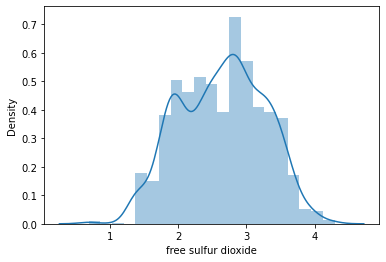

In [21]:
sn.distplot(df['free sulfur dioxide'])

Observation:After Applying log transformation we can see the curve looks normally distributed

<AxesSubplot:xlabel='quality', ylabel='count'>

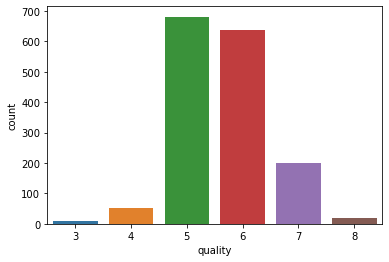

In [24]:
sn.countplot(df['quality'])

Observation:We can see from the above plot that the data is Imbalance

## Correlation Matrix

<AxesSubplot:>

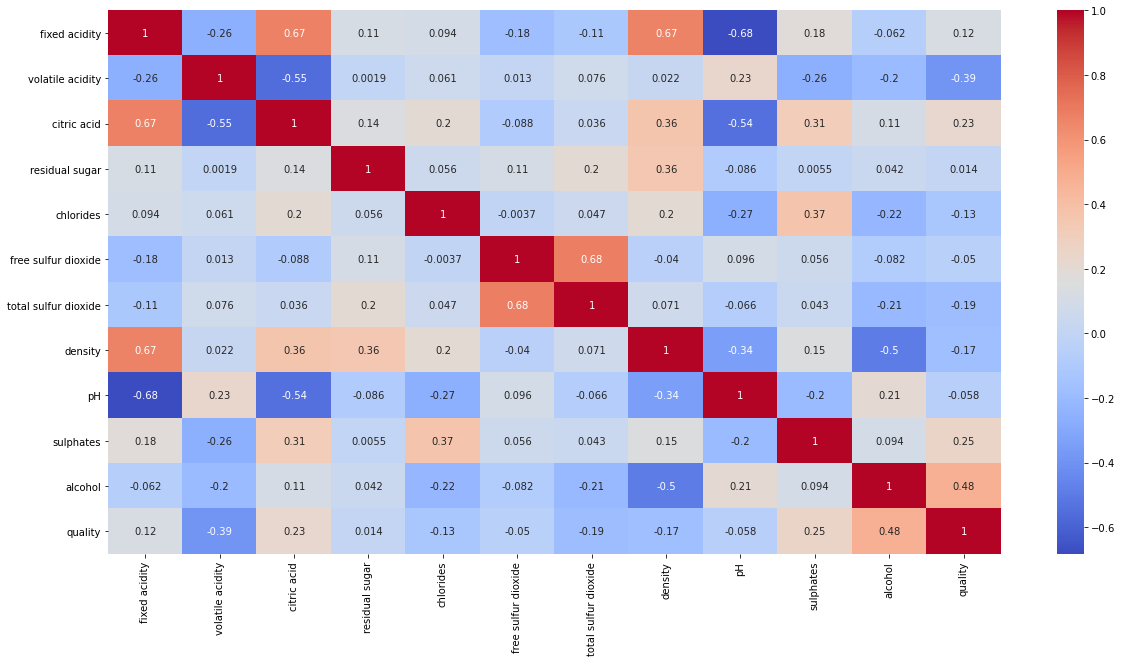

In [26]:
corr = df.corr()
plt.figure(figsize=(20,10))
sn.heatmap(corr, annot=True, cmap='coolwarm')

Observation:Co relation between free sulfur and total sulfur dioxide is seen strongly as they are mostly similar

In [155]:
#Appying Z-Score method to remove outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [156]:
#Appying Z-Score method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=ndf [(z<3).all(axis=1) ]

In [333]:
new_df.shape

(1457, 12)

In [178]:
new_df.skew()

fixed acidity           0.827710
volatile acidity        0.370297
citric acid             0.293662
residual sugar          2.415105
chlorides               2.270239
free sulfur dioxide    -0.078670
total sulfur dioxide    1.164786
density                 0.061234
pH                      0.120144
sulphates               0.881932
alcohol                 0.757576
quality                 0.412912
dtype: float64

In [159]:
df.shape

(1599, 12)

In [181]:
(1599-1461)/1599*100

8.630393996247655

By performing Z score method to remove outlier we are loosing about 8.63% data

In [161]:
#Appying IQR method to remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide      1.011601
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [162]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [163]:
#Appying IQR method to remove outliers
new_df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df1.shape

(1193, 12)

In [164]:
(1599-1193)/1193*100

34.03185247275775

By performing IQR method to remove outlier we are loosing about 34.03% data 

In [348]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide    -0.097399
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [353]:
#Applying Quantile method for removing skewness on medianmarechprebal90
min_threshold,max_threshold = df.chlorides.quantile([0.001,0.999])
min_threshold,max_threshold
    

new_df2=df[(df.chlorides<max_threshold) & (df.chlorides>min_threshold)]
new_df2.shape

(1595, 12)

In [354]:
(1599-1595)/1599*100

0.2501563477173233

Observation:By Applying Quantile method for outliers removal we can see that there is just 0.25% Data loss

In [351]:
new_df2.skew()

fixed acidity           0.981212
volatile acidity        0.670429
citric acid             0.292590
residual sugar          4.537566
chlorides               5.164640
free sulfur dioxide    -0.096992
total sulfur dioxide    1.523598
density                 0.104565
pH                      0.220128
sulphates               2.276434
alcohol                 0.863420
quality                 0.220215
dtype: float64

## Input Split

In [355]:
X = new_df2.drop(columns=['quality'])
y = new_df2['quality']

## Class Imbalancement

In [356]:
new_df2.skew()

fixed acidity           0.981212
volatile acidity        0.670429
citric acid             0.292590
residual sugar          4.537566
chlorides               5.164640
free sulfur dioxide    -0.096992
total sulfur dioxide    1.523598
density                 0.104565
pH                      0.220128
sulphates               2.276434
alcohol                 0.863420
quality                 0.220215
dtype: float64

In [357]:
y.value_counts()

5    680
6    638
7    197
4     52
8     18
3     10
Name: quality, dtype: int64

In [358]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()##SMOTE(k_neighbours=4) if error  expected k_neighbours
# Transform the dataset
X, y = oversample.fit_resample(X, y)

In [359]:
y.value_counts()

7    680
5    680
3    680
8    680
6    680
4    680
Name: quality, dtype: int64

## Model Training

In [401]:
#Classify Function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X,y):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state =42)
    #Train the Model
    model.fit(x_train,y_train)
    print("Accuracy:",model.score(x_test, y_test)*100)
    
    # Cross-validation
    score = cross_val_score(model, X,y, cv=5)
    print("CV Score:",np.mean(score)*100)

In [408]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1,X,y)

Accuracy: 48.8235294117647
CV Score: 48.84803921568627


In [419]:
48.84-48.82

0.020000000000003126

In [409]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
classify(model2,X,y)

Accuracy: 78.33333333333333
CV Score: 73.3578431372549


In [420]:
78.33-73.35

4.980000000000004

In [410]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
classify(model3,X,y)

Accuracy: 85.88235294117646
CV Score: 81.47058823529413


In [421]:
85.88-81.47

4.409999999999997

In [411]:
from sklearn.ensemble import ExtraTreesClassifier
model4 = ExtraTreesClassifier()
classify(model4,X,y)

Accuracy: 87.54901960784314
CV Score: 82.45098039215686


In [422]:
87.54-82.45

5.090000000000003

In [64]:
!pip install xgboost

In [412]:
import xgboost as xgb
model5 = xgb.XGBClassifier()
classify(model5,X,y)

[21:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 84.80392156862744
[21:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:48] WARNING: C:/Users/Administra

In [423]:
84.80-81.53

3.269999999999996

In [68]:
!pip install lightgbm

In [413]:
import lightgbm
model6 = lightgbm.LGBMClassifier()
classify(model6,X,y)

Accuracy: 85.58823529411764
CV Score: 81.66666666666667


In [424]:
85.58-81.66

3.9200000000000017

In [414]:
#Hyper parametertuning to omprovise the accuracy of the model
from sklearn.model_selection import GridSearchCV

In [415]:
parameter = { 'max_depth':np.arange(2,10),
               'criterion':['gini','entropy']}

In [416]:
GVC=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

In [393]:
GVC.fit(X,y)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [382]:
#To find the best max_depth for the model
GVC.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [417]:
Final_mod = ExtraTreesClassifier(criterion= 'entropy', max_depth= 9)
classify(Final_mod,X,y)

Accuracy: 79.11764705882352
CV Score: 75.02450980392157


## Final Model and Predicting Values

In [425]:
#Using model5 which is xgboost which is the most accurate model after subtracting from cross value score (84.84% Accurate)
import pickle
  
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(model5)
  
# Load the pickled model
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded pickled model to make predictions
Final_mod_from_pickle.predict(X)

array([5, 5, 5, ..., 8, 8, 8], dtype=int64)